In [8]:
import pandas as pd
import os
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
#from pivottablejs import pivot_ui
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
pd.set_option('display.max_columns', None) # or other number has no effect
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data_path = '../data/pred/data.csv'

In [11]:
data = pd.read_csv(data_path)

In [12]:
def plot_actual_vs_predicted(df, county, category_name):
    # Ensure date_week is in datetime format
    df["date_week"] = pd.to_datetime(df["date_week"])

    # Filter by county and category
    df_filtered = df[(df["county"] == county) & (df["category_name"] == category_name)]

    # Split actual and predicted data
    df_actual = df_filtered[df_filtered["is_predict"] == False]
    print(df_actual.head(3))
    df_predicted = df_filtered[df_filtered["is_predict"] == True]
    print(df_predicted.head(3))

    # Plot actual vs. predicted sales
    plt.figure(figsize=(12, 6))
    plt.plot(df_actual["date_week"], df_actual["bottles_sold"], marker='o', label="Actual Sales")
    plt.plot(df_predicted["date_week"], df_predicted["bottles_sold"], marker='o', linestyle="dashed", label="Predicted Sales")

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("Bottles Sold")
    plt.ylim(bottom=0)
    plt.title(f"Actual vs Predicted Sales for {category_name} in {county}")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

   date_week      county category_name  bottles_sold  is_predict
0 2024-01-07  BLACK HAWK           GIN          43.0       False
1 2024-01-14  BLACK HAWK           GIN          31.0       False
2 2024-01-21  BLACK HAWK           GIN          27.0       False
      date_week      county category_name  bottles_sold  is_predict
2352 2025-01-05  BLACK HAWK           GIN    145.646139        True
2353 2025-01-12  BLACK HAWK           GIN    310.247268        True
2354 2025-01-19  BLACK HAWK           GIN    311.196231        True


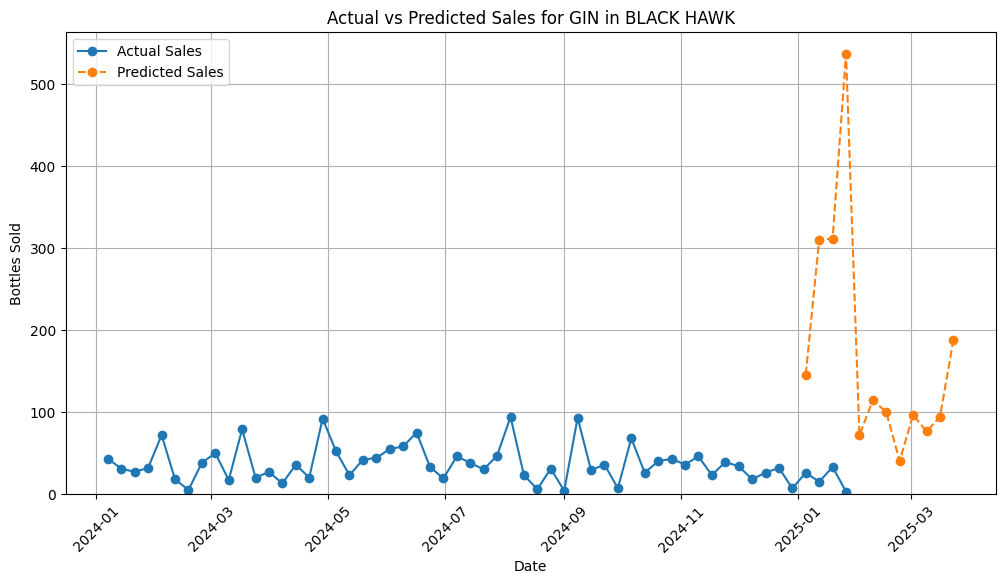

In [13]:
plot_actual_vs_predicted(data, 'BLACK HAWK', 'GIN')

    date_week      county category_name  bottles_sold  is_predict
52 2024-01-07  BLACK HAWK      LIQUEURS          26.0       False
53 2024-01-14  BLACK HAWK      LIQUEURS          73.0       False
54 2024-01-21  BLACK HAWK      LIQUEURS          62.0       False
      date_week      county category_name  bottles_sold  is_predict
2364 2025-01-05  BLACK HAWK      LIQUEURS     58.895754        True
2365 2025-01-12  BLACK HAWK      LIQUEURS     49.807905        True
2366 2025-01-19  BLACK HAWK      LIQUEURS     58.248646        True


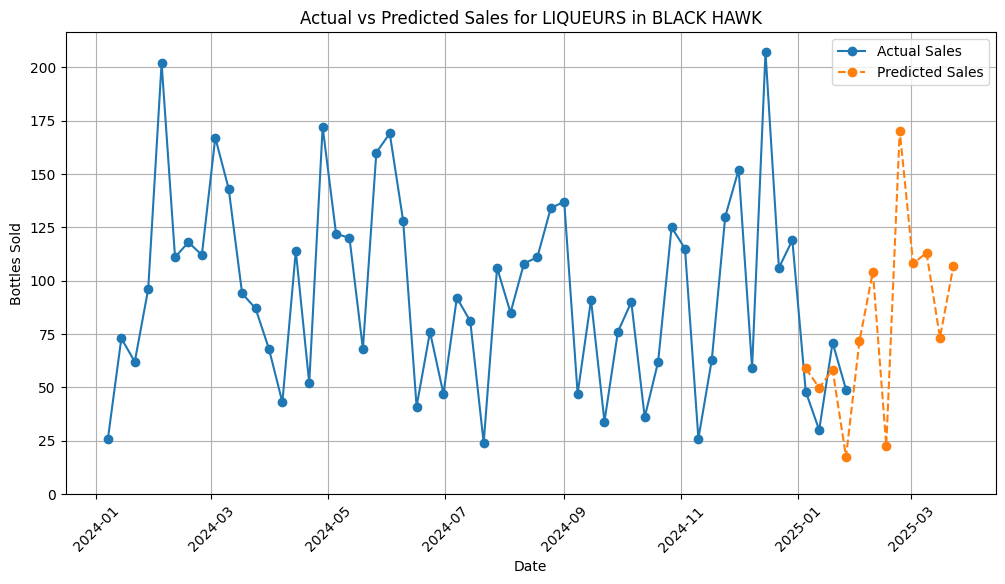

In [14]:
plot_actual_vs_predicted(data, 'BLACK HAWK', 'LIQUEURS')

     date_week      county category_name  bottles_sold  is_predict
104 2024-01-07  BLACK HAWK         OTROS          15.0       False
105 2024-01-14  BLACK HAWK         OTROS           0.0       False
106 2024-01-21  BLACK HAWK         OTROS          13.0       False
      date_week      county category_name  bottles_sold  is_predict
2376 2025-01-05  BLACK HAWK         OTROS     17.438893        True
2377 2025-01-12  BLACK HAWK         OTROS     16.360635        True
2378 2025-01-19  BLACK HAWK         OTROS     17.421067        True


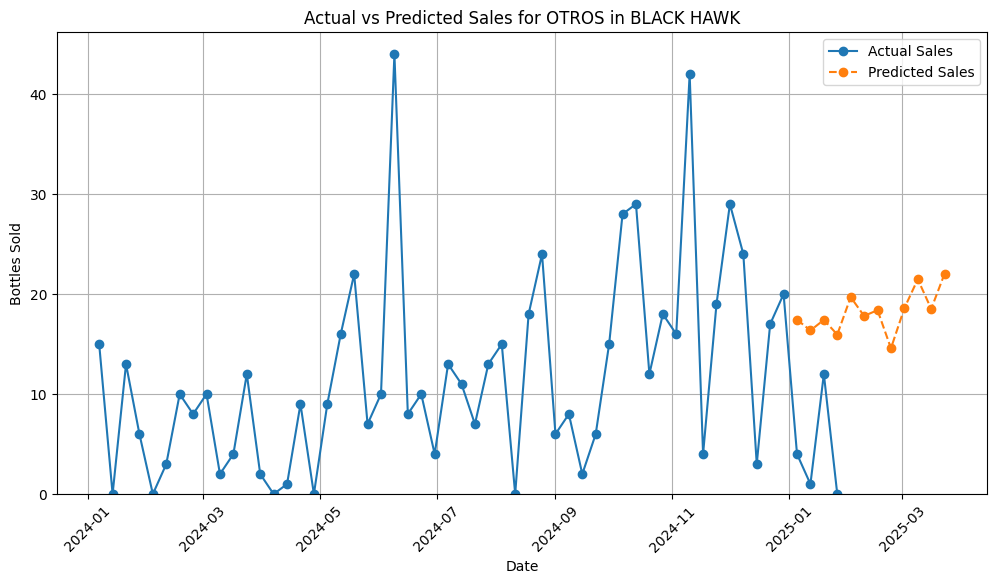

In [15]:
plot_actual_vs_predicted(data, 'BLACK HAWK', 'OTROS')

In [ ]:
data_proc_path = '../data/processed/data_processed.csv'
data_proc = pd.read_csv(data_proc_path)

In [ ]:
data_proc.head()